# Machine Learning workshop

In this workshop, we will study GSE53987 dataset on Bipolar disorder (BD) and major depressive disorder (MDD) and schizophrenia. You can download it [here](https://github.com/BRITE-REU/programming-workshops/blob/master/source/workshops/04_Machine_learning/data/GSE53987_combined.csv).

In total there are 205 rows consisting of 19 individuals diagnosed with BPD, 19 with MDD, 19 schizophrenia and 19 controls. Each sample has gene expression from 3 tissues (post-mortem brain). There are a total of 13768 genes (numeric features) and 10 meta features and 1 ID (GEO sample accession).

- Age
- Race (W for white and B for black)
- Gender is F for female and M for male
- Ph is the ph of the brain tissue
- Pmi is the post mortal interval
- Rin is the RNA integrity number
- Patient is unique for each patient. Each patient has up to 3 tissue samples. The patient ID is written as disease followed by a number from 1 to 19
- Tissue is the tissue the expression was obtained from.
- Disease.state is the class of disease the patient belongs to: bipolar, schizophrenia, depression or control.
- source.name is the combination of th etissue and disease.state

In [81]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# load data (change location if necessary)
data = pd.read_csv("GSE53987_combined.csv", index_col=0)

In [83]:
# Let's take a look at the first 5 rows of our dataframe
data.head()

,Patient,Source.name,Age,Gender,Race,Pmi,Ph,Rin,Tissue,Disease.state,...,ZSWIM8.AS1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYX,ZZEF1,ZZZ3
GSM1304852,bipolar_10,"hippocampus, bipolar disorder",52,M,W,23.5,6.7,6.3,hippocampus,Bipolar disorder,...,5.985163,6.428342,3.909310,6.046175,4.277563,4.107621,6.688651,7.228978,5.891636,7.982137
GSM1304853,bipolar_11,"hippocampus, bipolar disorder",50,F,W,11.7,6.4,6.8,hippocampus,Bipolar disorder,...,6.177670,6.537507,4.552976,7.335697,4.358375,4.132819,6.475851,7.028054,5.905446,7.891166
GSM1304854,bipolar_12,"hippocampus, bipolar disorder",28,F,W,22.3,6.3,7.7,hippocampus,Bipolar disorder,...,5.544327,6.732762,5.078011,7.470260,4.405250,4.137028,6.020157,6.810143,5.610422,7.940210
GSM1304855,bipolar_13,"hippocampus, bipolar disorder",55,F,W,17.5,6.4,7.6,hippocampus,Bipolar disorder,...,5.978466,6.913840,4.864570,7.175861,4.206593,4.005465,6.586425,6.818529,5.769763,7.987298
GSM1304856,bipolar_14,"hippocampus, bipolar disorder",58,M,W,27.7,6.8,7.0,hippocampus,Bipolar disorder,...,6.138507,6.756435,4.203565,7.032669,4.284513,4.128175,6.633143,7.037504,5.926310,8.002489


## Task 1

Check all the features. Which features are numeric, which are categorical? Understanding the nature of your data is a very important and necessary first step before proceeding with any analysis.

- What type of distributions exist within the features? Is Gender a balanced feature (roughly equal representation between both men and women)? Are numerical values normally distributed? Explore numerical distributions by plotting histograms for Age, an Age + Gender histogram, and one of your favorite genes found in the dataset.

- Some features display factor dependent values. That is, whether a subject is a male or a female might effect the expression patterns of a given gene. Explore factor and feature relationships by creating boxplots to observe how Age is dependent on Tissue, Gender and Disease.status.

In [84]:
# Explore the distribution of genders
data["Gender"].value_counts()

M    112
F     93
Name: Gender, dtype: int64

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

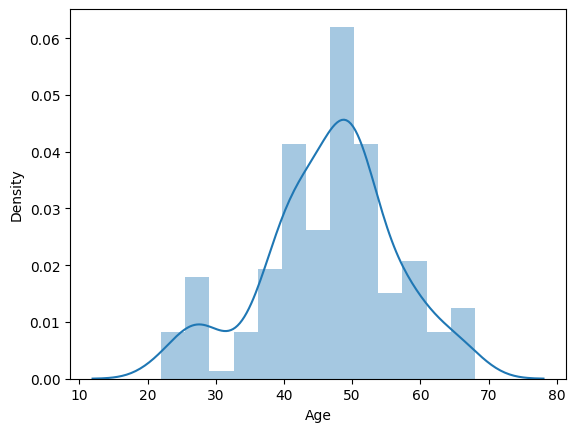

In [85]:
# Histogram of the age
sns.distplot(data["Age"])

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


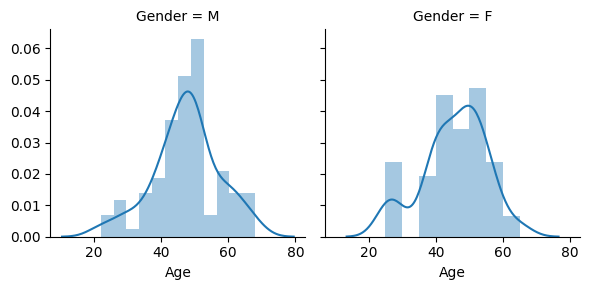

In [86]:
# Histogram of the Age faceted by Gender
g = sns.FacetGrid(data, col="Gender", margin_titles=True)
g.map(sns.distplot, "Age")

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ZWINT', ylabel='Density'>

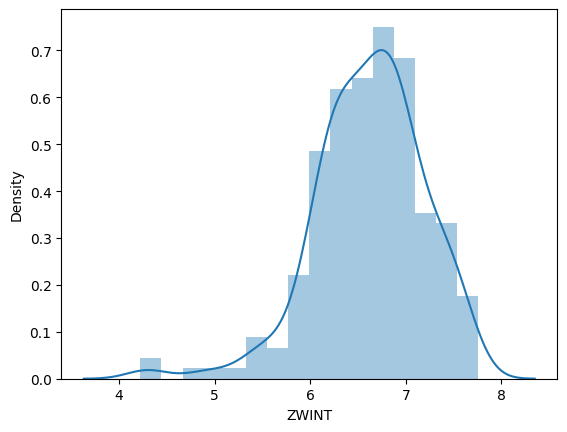

In [87]:
# Histogram of the gene expression of ZWINT across samples
sns.distplot(data["ZWINT"])

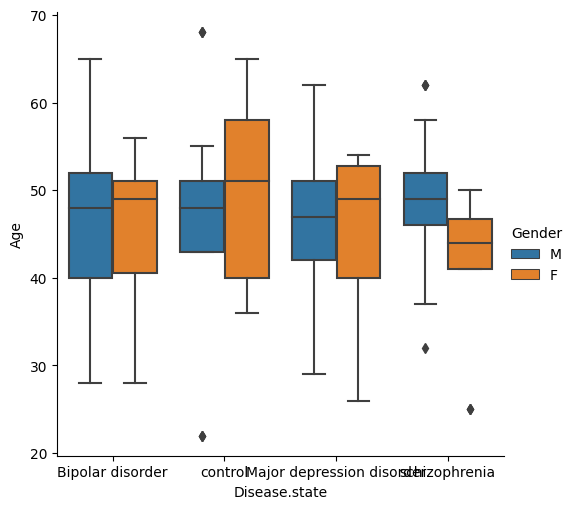

In [88]:
# Relationship between age, disease state and gender
sns.catplot(data=data, x="Disease.state", y="Age", hue="Gender", kind="box")

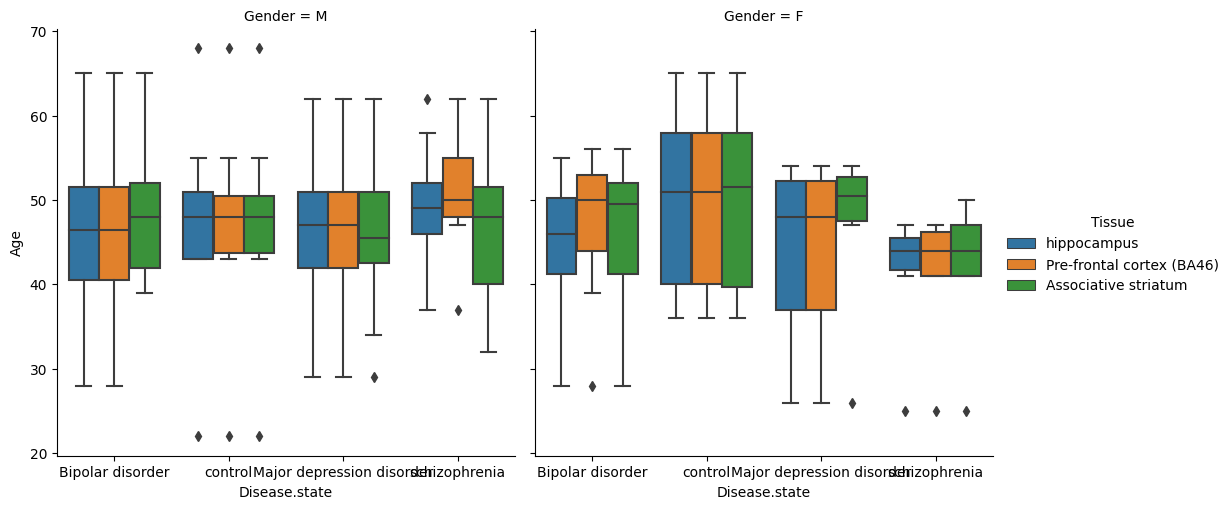

In [89]:
# # Relationship between age, disease state, tissue type and gender(facet)
sns.catplot(data=data, x="Disease.state", y="Age", hue="Tissue", col="Gender", kind="box")

## Task 2

Principal Component Analysis (PCA) is a commonly used technique to create linearly uncorrelated features from a set of possibly correlated features. The procedure is done in such a way that the first feature produced by PCA, the first principal component – PC1, explains the largest amount of variability possible. In this way, PCA is a dimension reduction technique, as the first few principal components often explain upwards of 90% of the variability found within a dataset. It is important to note that if we’re planning on predicting anything using the principal components, such as tissue type or Disease.status, those features should not be included in the input matrix. Before performing PCA, create a new data frame containing only explanatory values (i.e. the features we want to use to predict class membership).

- Explore how much variation is explained by the principal components. How much variation is explained by the first two principal components? How many principal components might be required to explain 75%, 85%, 90%, 95%, and 99% of the variation within our dataset?

- Visually explore this separation to plot the first two principal components and color samples according to Tissue and Disease.status. What effect does plotting the third principal component have on sample separation?

- Subset the dataset into three disjoint datasets by Tissue. Run PCA on all three of these datasets, plot the first two principal components, and color the dots according to Disease.status. Does there appear to be a meaningful difference in the separation between disease classes between the three different datasets?


In [90]:
# Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA

In [91]:
# Create a dataframe containing only the expression data
expression = data.iloc[:, 10:]
# Create a PCA class with 2 components
pca = PCA(n_components=2)
# Fit and tranform the data
pca.fit(expression)
expression_decomp = pca.transform(expression)

In [92]:
# How much variance is explanined by the principal components?
pca.explained_variance_ratio_

array([0.46909932, 0.15195595])

Text(0, 0.5, 'PCA2')

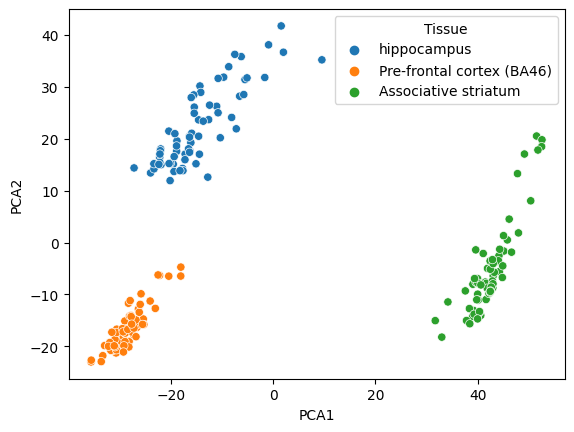

In [93]:
# Visualize the PCA plot color by Tissue or Disease.state
g = sns.scatterplot(x=expression_decomp[:, 0], y=expression_decomp[:, 1], hue=data["Tissue"])
g.set_xlabel("PCA1")
g.set_ylabel("PCA2")

In [94]:
# Hippocampus subset
hippocampus = data[data["Tissue"] == "hippocampus"]
# Create a dataframe containing only the expression data
hippocampus_expression = hippocampus.iloc[:, 10:]
# Create a PCA class with 2 components
hippocampus_pca = PCA(n_components=2)
# Fit and tranform the data
hippocampus_pca.fit(expression)
hippocampus_expression_decomp = hippocampus_pca.transform(hippocampus_expression)

Text(0, 0.5, 'PCA2')

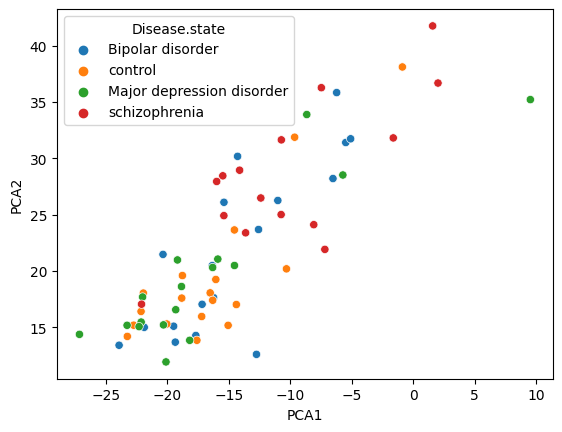

In [95]:
# Visualize the hippocampus PCA plot
g = sns.scatterplot(x=hippocampus_expression_decomp[:, 0], y=hippocampus_expression_decomp[:, 1], hue=hippocampus["Disease.state"])
g.set_xlabel("PCA1")
g.set_ylabel("PCA2")

## Task 3

Feature selection is a commonly performed step in statistics/machine learning to distinguish the most informative variable to use in model creation. There are several different ways to perform feature selection, and many of these can be application specific. In this workshop we’ll explain two possible avenues for feature selection in gene expression data analysis: 1) removing the least variable features 2) univariate feature selection

In [96]:
# Refer to https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2

In [97]:
# Removing features with low variance (<0.1)
sel = VarianceThreshold(threshold=0.1)
expression_highvar = sel.fit_transform(expression)

In [98]:
# Univariate feature selection using the chi2 test
target = data["Tissue"]
expression_kbest = SelectKBest(chi2, k=10).fit_transform(expression, target)

## Task 4

Unsupervised learning can be thought of as applying an algorithm to a dataset in order to discover latent structure that exists between samples. We’ve already been exposed to some of these algorithms via PCA. However, one of the most common techniques in machine learning, and especially bioinformatics, is clustering. Cluster the data using the k-means algorithm.

In [99]:
# Refer to https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

In [100]:
# Initialize a KMeans object with n_clusters=3
kmeans = KMeans(n_clusters=3)
# Fit data and get predictions
kmeans.fit(expression)
predicted_tissue = kmeans.predict(expression)

In [101]:
# Compare predicted tissue data to actual tissue data

<AxesSubplot:>

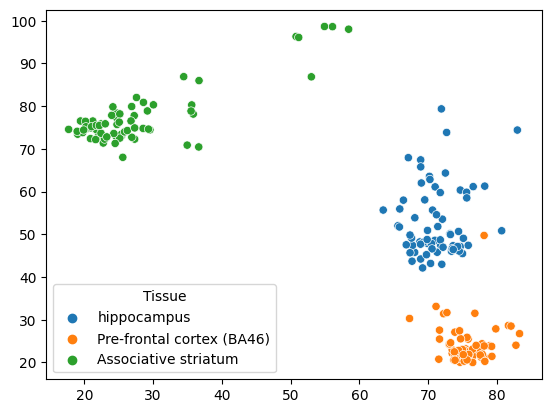

In [102]:
# Transform expression into a cluster-distance space and visualize the results
expression_kmeans = kmeans.transform(expression)
sns.scatterplot(x=expression_kmeans[:, 0], y=expression_kmeans[:, 1], hue=data["Tissue"])

## Task 5

Supervised learning is a technique to teach an algorithm to distinguish between previously labelled groups, such as Tissue, Gender, or Disease.status. However, all supervised methods require data to learn how to differentiate between classes. Therefore, it is necessary to separate data into test/train sets. The training set is used to train the model, while the test set is used to evaluate performance. Cross-validation, a method of partitioning the data into disjoint subsets and continually re-training and re-testing with different partition combinations, is often used to evaluate models. In this section, we will build various classifiers using logistic regression to predict different classes from our data. You should evaluate your models’ performances using confusion matrices and accuracy scores.

In [103]:
# Refer to https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [104]:
# Set the target of the classifier (either "Disease.state" or "Tissue")
target = data["Gender"]

In [105]:
# Split the data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(expression, target, test_size=.25, stratify=target)

In [119]:
# Initialize the LogisticRegression class
clf = LogisticRegression(solver="lbfgs", multi_class="auto")
# Fit and predict
clf.fit(X_train, y_train)
clf.predict(X_test)

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['F', 'M', 'F', 'M', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F',
       'M', 'M', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'F',
       'M', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M',
       'M', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'F'],
      dtype=object)

In [120]:
# What is the accuracy score of the test data?
clf.score(X_test, y_test)

0.9615384615384616

In [121]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[23,  1],
       [ 1, 27]])

In [122]:
# Refer to https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
from sklearn.model_selection import cross_val_score

In [123]:
# Perform a 5 fold cross validation on the model
lr_cv = LogisticRegression(solver="lbfgs", multi_class="auto")
cv_results = cross_val_score(lr_cv, X_train, y_train, cv=5)

In [124]:
# Cross validation results
cv_results

array([0.64516129, 0.96774194, 0.87096774, 0.76666667, 0.86666667])

In [126]:
# Run classifier Neural Net
classifier = MLPClassifier(alpha=0.001, max_iter=10000).fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("NN relu:", score)


# Run classifier Neural Net
classifier = MLPClassifier(alpha=0.001, max_iter=10000, activation='logistic').fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("NN logistic:", score)


# Run classifier Neural Net
classifier = MLPClassifier(alpha=0.001, max_iter=10000, activation='tanh').fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("NN tanh:", score)


# Run classifier Neural Net
classifier = MLPClassifier(alpha=0.001, max_iter=10000, activation='identity').fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("NN identity:", score)

# Random Forest

classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1).fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("Random forest:", score)

# KNN
classifier = KNeighborsClassifier(3).fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("KNN:", score)

NN relu: 0.6730769230769231
NN logistic: 0.8269230769230769
NN tanh: 0.8076923076923077
NN identity: 0.7884615384615384
Random forest: 0.4807692307692308
KNN: 0.6730769230769231


Let's try to standardize features by removing the mean and scaling to unit variance. 
The standard score of a sample x is calculated as: z = (x - u) / s, where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).


In [127]:
# scale the features with StandartScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

expression_scaled = StandardScaler().fit_transform(expression)
X_train, X_test, y_train, y_test = train_test_split(expression_scaled, target, test_size=.25, stratify=target)


In [128]:
# Rerun the models withe the scaled features

# Run classifier Neural Net
classifier = MLPClassifier(alpha=0.001, max_iter=10000).fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("NN relu:", score)


# Run classifier Neural Net
classifier = MLPClassifier(alpha=0.001, max_iter=10000, activation='logistic').fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("NN logistic:", score)


# Run classifier Neural Net
classifier = MLPClassifier(alpha=0.001, max_iter=10000, activation='tanh').fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("NN tanh:", score)


# Run classifier Neural Net
classifier = MLPClassifier(alpha=0.001, max_iter=10000, activation='identity').fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("NN identity:", score)

# Random Forest

classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1).fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("Random forest:", score)

# KNN
classifier = KNeighborsClassifier(3).fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("KNN:", score)

NN relu: 0.6730769230769231
NN logistic: 0.6923076923076923
NN tanh: 0.7115384615384616
NN identity: 0.7307692307692307
Random forest: 0.6153846153846154
KNN: 0.5769230769230769
